# Market level, change sampling frequency 

In [1]:
use "../3_output/regression_analysis_mkt_with_ent_sent_june9.dta", clear






  Variables that uniquely identify margins: ent_mkt


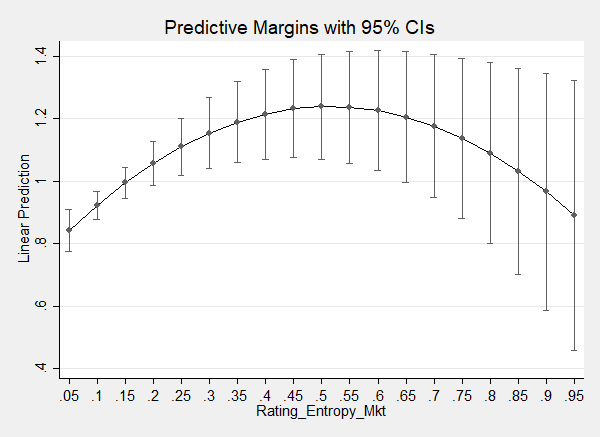

In [2]:
set scheme sj
qui:xtreg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  , fe vce(cluster market)
qui: margins , at(ent_mkt=(0.05(0.05)0.95))
marginsplot

In [3]:
replace ent_mkt=1 if (ent_mkt!=.&ent_mkt>1)

(4 real changes made)


In [4]:
su ent_mkt,d


                     Rating_Entropy_Mkt
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            0              0       Obs                 804
25%            0              0       Sum of Wgt.         804

50%     .1146653                      Mean           .1849677
                        Largest       Std. Dev.      .2328251
75%     .3020831              1
90%     .5099633              1       Variance       .0542075
95%     .6365142              1       Skewness       1.303736
99%     .9556999              1       Kurtosis       4.321588


In [5]:
replace ent_mkt=1 if (ent_mkt!=.&ent_mkt>1) 
gen ent_mkt_demean=ent_mkt-.1763819



(0 real changes made)

(724 missing values generated)


## label variables 

In [6]:
label variable ent_mkt "Rating_Entropy_Mkt"
label variable ent_mkt_demean "Rating_Entropy_Mkt"
label variable log_sum_quotes "Market_Transaction"
label variable avgmean_mkt "Average_Rating_Mkt"
label variable log_zip_rev "Market_LogRevenue"
label variable experience "Experience"
label variable temp_own_price_diff_other "Price_Difference"

## Original analysis - table 

In [7]:


preserve
drop  if ent_mkt==.
eststo clear
qui:areg f.log_sum_quotes   avgmean_mkt  log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  , absorb(market) vce(robust)
eststo
qui:areg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt    log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  , absorb(market) vce(cluster market)
eststo
esttab, order( ent* c.ent*  avg* experience temp_own_price_diff_other log_zip_rev )  drop(dummy* c.log_zip_rev#c.log_zip_rev) p label scalars(r2 aic bic) 
restore 
//esttab using reg_mkt_simplified.csv,  drop(dummy* c.log_zip_rev#c.log_zip_rev) p label scalars(r2 aic bic) replace
//esttab using reg_mkt_simplified.csv, replace order( ent* c.ent*  avg* experience temp_own_price_diff_other log_zip_rev )  drop(dummy* c.log_zip_rev#c.log_zip_rev) p label scalars(r2 aic bic) 




(724 observations deleted)



(est1 stored)


(est2 stored)


----------------------------------------------------
                              (1)             (2)   
                     F.Market_T~n    F.Market_T~n   
----------------------------------------------------
Rating_Entropy_Mkt                          1.657** 
                                          (0.004)   

Rating_Entropy_Mkt~r                       -1.568** 
                                          (0.009)   

Average_Rating_Mkt        -0.0987          0.0176   
                          (0.507)         (0.937)   

Experience                 0.0118         0.00721   
                          (0.133)         (0.394)   

Price_Difference           0.0596         -0.0351   
                          (0.844)         (0.922)   

Market_LogRevenue         -0.0238         -0.0138   
                          (0.525)         (0.726)   

Constant                    2.862*          1.926   
                          (0.

## Subset to high sum_reviews 

In [9]:
su sum_reviews,d


                     (first) sum_reviews
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            0              0       Obs               1,528
25%            0              0       Sum of Wgt.       1,528

50%            3                      Mean           16.71204
                        Largest       Std. Dev.      37.07434
75%           14            305
90%           46            308       Variance       1374.506
95%           90            312       Skewness       4.144905
99%          191            314       Kurtosis       24.52422


In [53]:
su experience,d


                         Experience
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            0              0       Obs               1,528
25%            0              0       Sum of Wgt.       1,528

50%          4.5                      Mean           4.870216
                        Largest       Std. Dev.      5.222168
75%          8.5             27
90%        10.75             27       Variance       27.27104
95%           14             27       Skewness        1.09527
99%         20.5             27       Kurtosis       4.476818


In [63]:


preserve 
drop  if ent_mkt==.
keep if sum_reviews>=8
eststo clear
qui:areg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt    log_zip_rev c.log_zip_rev#c.log_zip_rev  experience  temp_* , absorb(market)  
eststo
restore 
qui:areg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt    log_zip_rev c.log_zip_rev#c.log_zip_rev  experience  temp_* dummy* if mod(year_month_count,2)==1 , absorb(market)  
eststo
qui:areg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt    log_zip_rev c.log_zip_rev#c.log_zip_rev  experience  temp_* dummy*  if mod(year_month_count,4)==1 , absorb(market)  
eststo
//qui:areg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt    log_zip_rev c.log_zip_rev#c.log_zip_rev  experience  temp_* dummy*  if experience>5 , absorb(market)  
//eststo
esttab using rob_mkt_resample.csv,  drop(dummy* c.log_zip_rev#c.log_zip_rev) p label scalars(r2 aic bic) replace
esttab, order( ent* c.ent*  avg* experience temp_own_price_diff_other log_zip_rev )  drop(dummy* c.log_zip_rev#c.log_zip_rev) p label scalars(r2 aic bic) 




(724 observations deleted)

(341 observations deleted)



(est1 stored)



(est2 stored)


(est3 stored)

(note: file rob_mkt_resample.csv not found)
(output written to rob_mkt_resample.csv)


--------------------------------------------------------------------
                              (1)             (2)             (3)   
                     F.Market_T~n    F.Market_T~n    F.Market_T~n   
--------------------------------------------------------------------
Rating_Entropy_Mkt          2.173**         1.720**         2.365** 
                          (0.001)         (0.001)         (0.004)   

Rating_Entropy_Mkt~r       -2.487***       -1.928**        -2.498*  
                          (0.001)         (0.004)         (0.013)   

Average_Rating_Mkt         0.0923         -0.0596          -0.176   
                          (0.640)         (0.730)         (0.524)   

Experience                0.00331        -0.00602         0.00345   
                          (0.780)         (